<a href="https://colab.research.google.com/github/carvalhopinheiro/Portfolio/blob/main/Churn_Prediction_para_uma_empresa_de_Telecomunica%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
<img alt="Colaboratory logo" width="15%" src="https://github.com/PAlab0/PAlab0/blob/main/logo.png?raw=true">


*by [Paulo Victor](https://www.linkedin.com/in/carvalhopinheiro/)*

---

# Churn Prediction (Taxa de Rotatividade)
***Churn rate***, ou simplesmente *churn*, representa a taxa de rotatividade ou evasão da sua base de clientes, ou seja, **indica o número de clientes que cancelam em determinado período de tempo**. Em serviços como Spotify ou Netflix, ela representaria a taxa de cancelamento de assinaturas. Entender por que seus clientes abandonam o seu produto ou serviço é vital para conquistar um crescimento sustentável, como o Churn tem um efeito negativo na receita de uma empresa, entender o que é esse indicador e como trabalhar para mitigar essa métrica é algo crítico para o sucesso de muitos negócios.


<p align=center>
<img src="https://github.com/carvalhopinheiro/Coisas-Salvas/blob/main/1.png?raw=true" width="100%"></p>



**Qual a taxa ideal de Churn?**
* De modo geral, a empresa Bessemer Venture Partners, que está sediada no Vale do Silício e gerencia mais de $ 4 bilhões em investimentos ao redor do mundo, indica que uma **taxa de cancelamento aceitável deve ficar entre 5% e 7%**. Muitos negócios costumam ter essa média como base.

**Por que fazer Churn Prediction?**

Uma das soluções mais eficientes oferecidas pelo Big Data é o Churn Prediction, ou seja, a previsão do abandono de um serviço pelo cliente. Essa aplicação é realizada por meio de machine learning (método de análise de dados que faz uso automatizado de algoritmos que aprendem interativamente e encontram insights), a partir da análise da rotatividade da base de usuários propensos a desistir do que você oferece ao mercado.

Ao colocar em prática o conceito de Churn Prediction em sua empresa, será possível criar ações ou campanhas específicas para reter esses clientes e evitar, dessa forma, uma queda no número de conversões – e, consequentemente, no faturamento da empresa.

Outro ponto positivo da aplicação do Churn Prediction é a possibilidade da **redução de custos** e observação de novas oportunidades com **potenciais clientes**. Quando você consegue ter um overview do comportamento de seus consumidores, torna-se mais fácil antever suas necessidades e oferecer soluções que atendam essas demandas de forma assertiva.

Uma coisa que todo empresário sabe bem é que os custos para conquistar um novo cliente podem ser até **15 vezes maiores** do que para reter um cliente atual. Daí a importância de fazer uso do Big Data Analytics e de sua solução de Churn Prediction. **Com isso, o objetivo desse notebook é criar um modelo de machine learning na qual faça o Churn prediction de uma empresa de telecomunicações.**

# Aquisição dos Dados

Os dados utilizados neste projeto foram originalmente disponibilizados na [plataforma de ensino da IBM Developer](https://developer.ibm.com/technologies/data-science/patterns/predict-customer-churn-using-watson-studio-and-jupyter-notebooks/#), e tratam de um problema típico de uma companhia de telecomunicações e de qualquer outra empresa: cancelamento de serviço. O *dataset* completo pode ser encontrado [neste link](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv).

 
Logo, vamos instalar e importar as bibliotecas de python necessárias para fazer um modelo de machine learning (Aprendizado de máquina) e prever a taxa de rotatividade dos clientes, como também fazer uma análise das características dos clientes e definir as melhores estratégias para diminuir a taxa de cancelamento da empresa.



##Instalação e Importação Bibliotecas

In [250]:
!pip install -q scikit-plot # INSTALAÇÃO DA BIBLIOTECA SCIKIT

In [251]:
# IMPORTANDO OS PACOTES NECESSÁRIOS
import numpy as np # PROCESSAMENTO DE ARRANJOS E MATRIZES
import pandas as pd # MANIPULAÇÃO E ANÁLISE DE DADOS 
import matplotlib.pyplot as plt # VISUALIZAÇÃO DE DADOS
import seaborn as sns # VISUALIZAÇÃO DE DADOS
from sklearn.preprocessing import StandardScaler, LabelEncoder # PADRONIZAÇÃO DOS DADOS E TRANSFORMAÇÃO DOS DADOS
from sklearn.model_selection import train_test_split # DIVISÃO DOS DADOS EM TESTE E TREINO 
from imblearn.over_sampling import SMOTE # BALANCEAMENTO DOS DADOS
from imblearn.under_sampling import RandomUnderSampler # BALANCEAMENTO DOS DADOS
import scikitplot as skplt # GRÁFICO DE CONFUSÃO
from sklearn.metrics import classification_report # MÉTRICAS DE DESEMPENHO DO MODELO
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score # MÉTRICAS DE DESEMPENHO DO MODELO
from sklearn.model_selection import cross_val_score # VALIDAÇÃO CRUZADA
from sklearn.model_selection import RandomizedSearchCV # OTIMIZAÇÃO DE HIPERPARÂMETROS
from sklearn.tree import DecisionTreeClassifier # MODELO DE CLASSIFICAÇÃO MACHINE LEARNING
from sklearn.linear_model import LogisticRegression # MODELO DE CLASSIFICAÇÃO MACHINE LEARNING
from xgboost import XGBClassifier # MODELO DE CLASSIFICAÇÃO MACHINE LEARNING
from sklearn.ensemble import RandomForestClassifier # MODELO DE CLASSIFICAÇÃO MACHINE LEARNING
from sklearn.pipeline import make_pipeline # PIPELINE

## Importação dos dados

Com essas bibliotecas instaladas e importadas vamos começar a importar os dados e mostrar suas primeiras e ultimas entradas e entender como estão dispostas nossa variáveis e seus respectivos significados.


Lembrando que os dados utilizados neste projeto foram originalmente disponibilizados na [plataforma de ensino da IBM Developer](https://developer.ibm.com/technologies/data-science/patterns/predict-customer-churn-using-watson-studio-and-jupyter-notebooks/#),e tratam de um problema típico de uma companhia de telecomunicações e de qualquer outra empresa: cancelamento de serviço. O *dataset* completo pode ser encontrado [neste link](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv).

In [252]:
# IMPORTANDO OS DADOS
DATA_PATH = "https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(DATA_PATH)

# Análise Exploratória
### 5 Primeiras Entradas

In [253]:
# 5 PRIMEIRAS LINHAS
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### 5 Últimas Entradas

In [254]:
# 5 ÚLTIMAS LINHAS
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


### Dicionário das variáveis
* **customerID** - ID_Usuario
* **gender** - Gênero
* **SeniorCitizen** - Idoso
* **Partner** - Parceiro
* **Dependents** - Dependentes
* **tenure** - Meses
* **PhoneService** - Serviço de telefone
* **MultipleLines** - Multi linhas
* **InternetService** - Serviço de internet
* **OnlineSecurity** - Segurança Online
* **OnlineBackup** - Backup Online
* **DeviceProtection** - Proteção de dispositivo
* **TechSupport** - Suporte técnico
* **StreamingTV** - Transmissão de TV
* **StreamingMovies** - Streaming de filmes
* **Contract** - Contrato
* **PaperlessBilling** - Fatura sem papel
* **PaymentMethod** - Forma de pagamento
* **MonthlyCharges** - Cobranças Mensais
* **TotalCharges** - Custos totais
* **Churn** - Cancelamento

O Dataset é dividido em 3 grandes grupos são eles as características do cliente, o tipo de serviço oferecido a ele e por último questões relacionada a contrato e pagamento.

A variável alvo está na coluna **Churn**, indicando os potenciais cancelamentos;

### Tamanho do dataset

In [255]:
# TAMNHO DO DATASET - LINHAS E COLUNAS
print(f'O dataset conta com {df.shape[0]} linhas')
print(f'O dataset conta com {df.shape[1]} colunas')

O dataset conta com 7043 linhas
O dataset conta com 21 colunas


## Análise Exploratória dos Dados
Com uma breve noção sobre a quantidade de linhas e colunas do dataset, significados das variáveis e visualização das primeiras e últimas linhas, vamos partir para a análise dos dados em si.
 
Com isso, Vamos analisar:
* Tipo dos dados
* Quantidade de linhas vazias
* Estatísticas de variáveis numéricas
* Quantidade de valores únicos por variável
 
Isso nos permite entender melhor como estão os dados no dataset.

### Tipos dos Dados

In [256]:
# TIPO DA VARIÁVEL 
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Para melhor entendimento, vamos identificar os tipo de variáveis como:
 * **OBJECT** - Texto ou Palavra
 * **FLOAT** - Número Decimal
 * **INT** - Número Inteiro

Vemos que dezoito (18) variáveis estão como OBJECT, uma (1) como FLOAT e duas (2) como INT, por agora isso não será um problema, pois ainda estamos fazendo a análise exploratória do nosso dataset, porém quando chegamos na parte de treinar o modelo de ML (Machine Learning) e  prever o Churn teremos que transformar essas variáveis em numéricas, já que com essa prática o modelo desenvolve uma capacidade de previsão acima do que teria com as variáveis do tipo OBJECT.
 
Porém, se olharmos com atenção existe uma variável na qual está com o tipo incorreto: A variável ``total charges`` que representa o total de cobranças por cliente está como OBJECT, mas deveria ser um número decimal. Mas ao tentar transformá-la em FLOAT o algoritmo dá erro, pois existem valores nulos que não estão conseguindo ser transformados.
 
Com isso, para solucionarmos o problema, vamos utilizar uma função na qual transforma as linhas preenchidas em FLOAT e as linhas na qual estão dando erro em vazias.



#### Conventendo a variável TotalCharges para float


In [257]:
# FUNÇÃO DE CONVERSÃO DE OBJECT PARA FLOAT
def converter_str_float(entrada):
    """
    Converte um objeto do tipo string em float.

    # Arguments
        entrada: string, string da coluna TotalCharges.

    # Returns
        Valor convertido em float, caso permita a conversão.
        NaN, caso o valor não seja apropriado.
    """

    try:
        return float(entrada)
    except ValueError:
        return np.nan

In [258]:
# APLICANDO A FUNÇÃO 
df['TotalCharges'] = df['TotalCharges'].apply(converter_str_float)

### Quantidade de linhas vazias
 
Como disse anteriormente, para resolver o problema da transformação (OBJECT - FLOAT) algumas das linhas foram transformadas em valores nulos, ou seja, estão faltando dados, para uma melhor qualidade de previsão do modelo vamos substituir os valores faltantes pela mediana da variável.
 
**Por que utilizar a mediana como valor para substituir:**
 
A mediana é uma medida de tendência central da Estatística que corresponde ao valor central de um conjunto de valores ordenados,ou seja, tende a causar menos impacto na amostra. Com isso, aplicar a imputação dos valores nulos utilizando a média ou moda demonstra-se extremamente sensível à distribuição de dados, podendo criar grandes alterações dos valores analisados.


In [259]:
# LINHAS VAZIAS POR VARIÁVEL
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Foram encontradas 11 linhas vazias na variável TotalCharges        

#### Substituindo as linhas vazias pela mediana

In [260]:
# SUBSTITUINDO AS LINHAS VAZIAS PELA MEDIANA
TotalChargesMedian = df.TotalCharges.median()
df['TotalCharges'].fillna(TotalChargesMedian, inplace=True)

### Estatísticas de variáveis numéricas

In [261]:
# ESTATÍSTICA DAS VARIÁVEIS NUMÉRICAS
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


Podemos analisar com essas estatísticas que metade (50%) dos clientes possuem:
 
* 29 meses de tempo de serviço, ou seja 2 anos e 5 meses
* cobranças mensais de ``R$70``
* pagaram ``R$1397`` totais por cliente durante o período de tempo
 

 


### Quantidade de valores únicos por variável

In [262]:
# VALORES ÚNICOS
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

Sabemos que a maioria das variáveis possuem poucos valores unicos que se repetem entre os diversos clientes, lembrando que estas variáveis ainda estão como texto e será necessário transformá-las em uma solução numérica para otimização do nosso modelo de machine learning.

##Análise Exploratória das Variáveis

Para entender melhor a rede de clientes, vamos plotar algumas das variáveis do dataset relacionadas a características de perfil e pagamento, vale ressaltar que essa plotagem auxilia o desenvolvimento de estratégias empresariais no futuro. 
 
Porém como o objetivo desse notebook é criar um modelo de previsão de taxa de cancelamento, somente algumas das variáveis mais importante para auxiliar o entendimento serão graficamente representadas, mas se o objetivo do notebook também fosse uma análise de dados mais precisa seria altamente recomendável analisar as outras variáveis, pois, teríamos mais dados para futuramente implementar alguma estratégia empresarial.


### Quantidade de Clientes por Gênero

In [263]:
# CORES DOS GRÁFICOS
color1 = ['#00C752','#FE3353']
color2 = ['#FE3353','#00C752']
verde = '#00C752'
vermelho = '#FE3353'

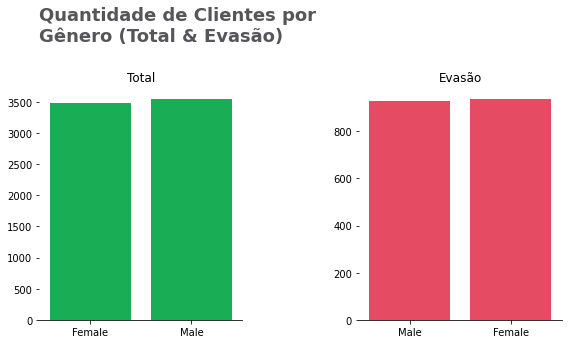

In [264]:
# PLOTAR GRÁFICO
fig, ax = plt.subplots(figsize=(8,5),nrows=1, ncols=2)
sns.countplot(x=df.gender, ax=ax[0],color=verde);
sns.countplot(x=df[df.Churn == 'Yes'].gender, ax=ax[1],color=vermelho);
ax[0].text(-0, 1.2,'Quantidade de Clientes por \nGênero (Total & Evasão)',transform=ax[0].transAxes, fontsize=18, fontweight='bold',color='#58555A')
ax[0].set_xlabel("")
ax[1].set_xlabel("")
ax[1].set_ylabel("")
ax[0].set_ylabel("")
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[0].set_title('Total')
ax[1].set_title('Evasão')
plt.tight_layout()

**Perfil dos clientes:**
* Não há diferença entre o número de clientes por gênero, ou seja, a quantidade de homens e mulheres são próximas.
 
**Perfil dos clientes que cancelam:**
* O gênero não exerce influência no cancelamento de serviços.


### Quantidade Total de Clientes Idosos

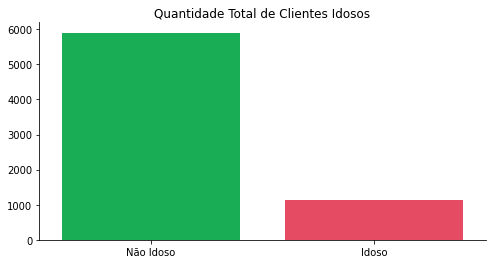

In [265]:
# PLOTAR GRÁFICO
fig, ax = plt.subplots(figsize=(8,4))
sns.countplot(x=df.SeniorCitizen);
ax.set_title('Quantidade Total de Clientes Idosos')
sns.set_palette(color1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)                                
ax.set_xlabel("")
ax.set_ylabel("")
plt.xticks([0, 1], ['Não Idoso', 'Idoso'])
plt.show()

In [266]:
# QUANTIDADE DE CADA CATEGORIA
print(df[df.Churn == 'Yes'].SeniorCitizen.value_counts())

0    1393
1     476
Name: SeniorCitizen, dtype: int64


**Perfil dos clientes:**
* Clientes não idosos são maiores em quantidade em relação aos clientes idosos
 
**Perfil dos clientes que cancelam:**
* Clientes não idosos tem 3x mais chances de cancelar do que clientes não idosos



### Quantidade de Clientes com Parceiros

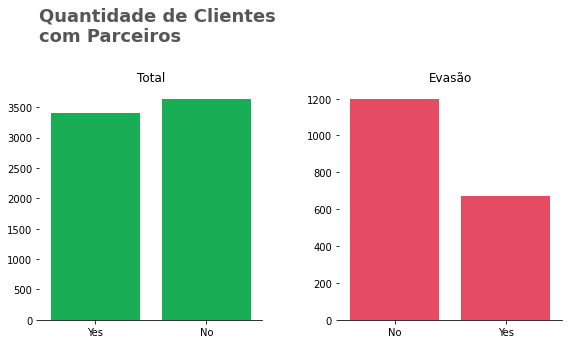

In [267]:
# PLOTAR GRÁFICO
fig, ax = plt.subplots(figsize=(8,5),nrows=1, ncols=2)
sns.countplot(x=df.Partner, ax=ax[0],color=verde);
sns.countplot(x=df[df.Churn == 'Yes'].Partner, ax=ax[1],color=vermelho);
ax[0].text(-0, 1.2,'Quantidade de Clientes\ncom Parceiros',transform=ax[0].transAxes, fontsize=18, fontweight='bold',color='#58555A')
ax[0].set_xlabel("")
ax[1].set_xlabel("")
ax[1].set_ylabel("")
ax[0].set_ylabel("")
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[0].set_title('Total')
ax[1].set_title('Evasão')
plt.tight_layout()

In [268]:
# QUANTIDADE DE CADA CATEGORIA
print(df[df.Churn == 'Yes'].Partner.value_counts())

No     1200
Yes     669
Name: Partner, dtype: int64


**Perfil dos clientes:**
* A quantidade de clientes com e sem parceiros são relativamente próximas, porém a categoria sem parceiros se sobressai em relação aos clientes com parceiros
 
**Perfil dos clientes que cancelam:**
* Clientes sem parceiros têm 2x mais chances de cancelar do que clientes com parceiros





### Quantidade de Clientes com Dependentes

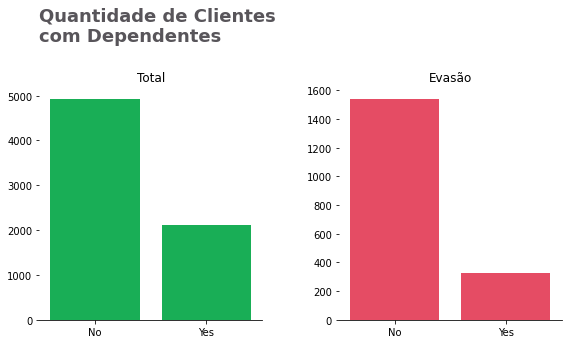

In [269]:
# PLOTAR GRÁFICO
fig, ax = plt.subplots(figsize=(8,5),nrows=1, ncols=2)
sns.countplot(x=df.Dependents, ax=ax[0],color=verde);
sns.countplot(x=df[df.Churn == 'Yes'].Dependents, ax=ax[1],color=vermelho);
ax[0].text(-0, 1.2,'Quantidade de Clientes\ncom Dependentes',transform=ax[0].transAxes, fontsize=18, fontweight='bold',color='#58555A')
ax[0].set_xlabel("")
ax[1].set_xlabel("")
ax[1].set_ylabel("")
ax[0].set_ylabel("")
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[0].set_title('Total')
ax[1].set_title('Evasão')
plt.tight_layout()

In [270]:
# QUANTIDADE DE CADA CATEGORIA
print(df[df.Churn == 'Yes'].Dependents.value_counts())

No     1543
Yes     326
Name: Dependents, dtype: int64


**Perfil dos clientes:**
* O número de clientes sem dependentes é maior do que os consumidores com dependentes
 
**Perfil dos clientes que cancelam:**
* Clientes sem dependentes têm 5x mais chances de cancelar do que clientes com dependentes



### Quantidade de Clientes por forma de pagamento

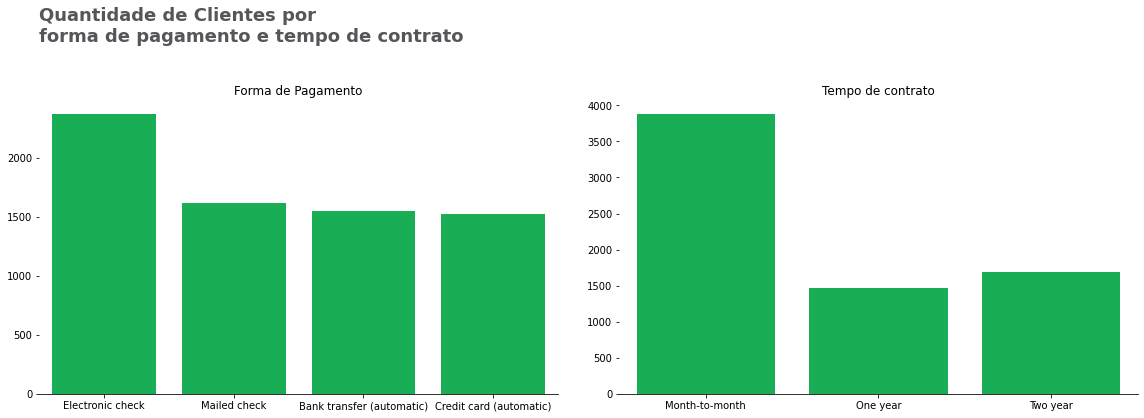

In [271]:
# PLOTAR GRÁFICO
fig, ax = plt.subplots(figsize=(16,6),nrows=1, ncols=2)
sns.countplot(x=df.PaymentMethod, ax=ax[0],color=verde);
sns.countplot(x=df.Contract, ax=ax[1],color=verde);
ax[0].text(0, 1.2,'Quantidade de Clientes por \nforma de pagamento e tempo de contrato',transform=ax[0].transAxes, fontsize=18, fontweight='bold',color='#58555A')
ax[0].set_xlabel("")
ax[1].set_xlabel("")
ax[1].set_ylabel("")
ax[0].set_ylabel("")
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[0].set_title('Forma de Pagamento')
ax[1].set_title('Tempo de contrato')
plt.tight_layout()

In [272]:
# QUANTIDADE DE CADA CATEGORIA
print('Quantidade de clientes que cancelaram por Forma de pagamento')
print(df[df.Churn == 'Yes'].PaymentMethod.value_counts())
print( 25 *'-=')
print('Quantidade de clientes que cancelaram por Contrato')
print(df[df.Churn == 'Yes'].Contract.value_counts())

Quantidade de clientes que cancelaram por Forma de pagamento
Electronic check             1071
Mailed check                  308
Bank transfer (automatic)     258
Credit card (automatic)       232
Name: PaymentMethod, dtype: int64
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Quantidade de clientes que cancelaram por Contrato
Month-to-month    1655
One year           166
Two year            48
Name: Contract, dtype: int64


**Perfil dos clientes:**
* a maioria dos consumidores optam por pagar suas cobranças via electronic check(cheque eletrônico)
* a maioria dos clientes possuem contrato mensal
 
**Perfil dos clientes que cancelam:**
* 57,3% dos consumidores pagavam suas cobranças via electronic check(cheque eletrônico)
* 88,5% dos consumidores possuíam contrato mensal


### Quantidade de Clientes por mês de fidelidade

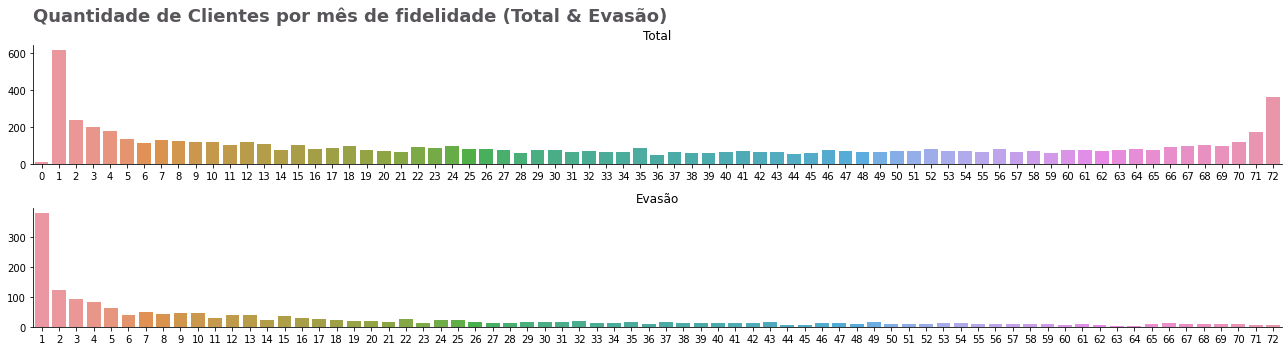

In [273]:
# PLOTAR GRÁFICO
fig, ax = plt.subplots(figsize=(18,5),nrows=2, ncols=1)
sns.countplot(x=df.tenure, ax=ax[0]);
sns.countplot(x=df[df.Churn == 'Yes'].tenure, ax=ax[1]);
ax[0].text(0, 1.2,'Quantidade de Clientes por mês de fidelidade (Total & Evasão)',transform=ax[0].transAxes, fontsize=18, fontweight='bold',color='#58555A')
ax[0].set_title('Total')
ax[1].set_title('Evasão')
ax[0].set_xlabel("")
ax[1].set_xlabel("")
ax[0].set_ylabel("")
ax[1].set_ylabel("")
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
plt.tight_layout()

**Perfil dos clientes:**
* A empresa possui mais consumidores no primeiro mês, porém muitos clientes já possuem 72 meses de fidelidade
* entre os meses 6-69 a empresa possui uma constância na quantidade de clientes
 
**Perfil dos clientes que cancelam:**
* O primeiro mês representa a maior taxa de cancelamento
* os cancelamentos vao diminuindo progressivamente ate o sexo mes, a partir dai seguesse uma constancia, mas com reduções da taxa de cancelamento com o passar dos meses.

### Boxplot de Cobranças Mensais e Totais

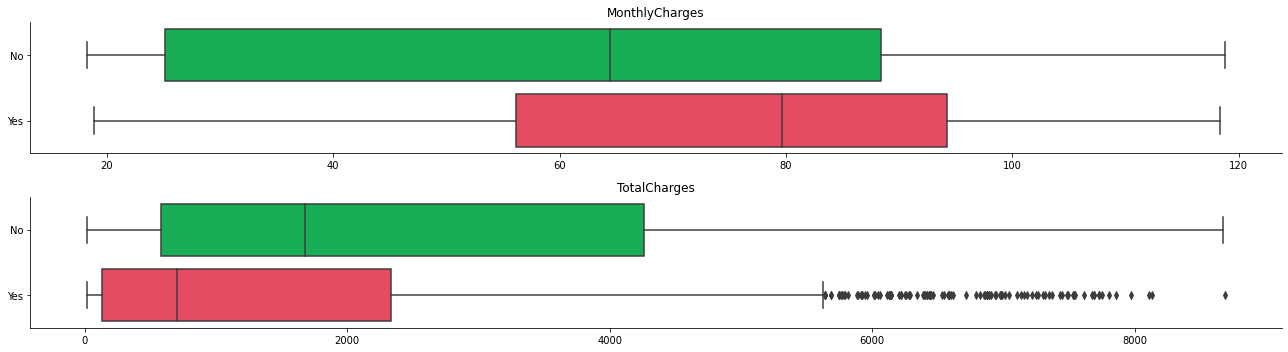

In [274]:
# PLOTAR GRÁFICO
fig, ax = plt.subplots(figsize=(18,5),nrows=2,ncols=1)
sns.boxplot(x=df.MonthlyCharges, y=df.Churn,ax=ax[0]);
sns.boxplot(x=df.TotalCharges, y=df.Churn,ax=ax[1]);
sns.set_palette(color1)
ax[0].set_title('MonthlyCharges')
ax[1].set_title('TotalCharges')
ax[0].set_xlabel("")
ax[1].set_xlabel("")
ax[0].set_ylabel("")
ax[1].set_ylabel("")
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

In [275]:
# ESTATÍSTICA DOS VALORES NÚMERICOS QUE CANCELARAM
df[df.Churn == 'Yes'].describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,1869.000000,1869.000000,1869.000000,1869.000000
mean,0.254682,17.979133,74.441332,1531.796094
std,0.435799,19.531123,24.666053,1890.822994
min,0.000000,1.000000,18.850000,18.850000
25%,0.000000,2.000000,56.150000,134.500000
50%,0.000000,10.000000,79.650000,703.550000
75%,1.000000,29.000000,94.200000,2331.300000
max,1.000000,72.000000,118.350000,8684.800000


**Perfil dos clientes que cancelam:**
* Metade dos clientes Pagavam cerca ``R$80`` por mês 
* Metade dos consumidores que cancelaram fizeram após 10 meses de serviço
* 25% dos consumidores pagavam cerca de `R$56` por mês
* 25% dos clientes que cancelaram fizeram após 2 meses de serviço

### Quantidade de revalidação e Cancelamento

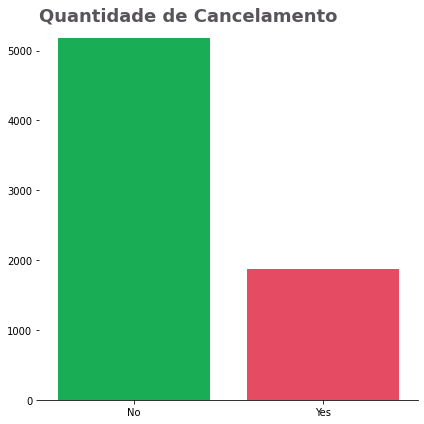

In [276]:
# PLOTAR GRÁFICO
fig, ax = plt.subplots(figsize=(6,6))
sns.countplot(x=df.Churn, ax=ax);
ax.text(0, 1,'Quantidade de Cancelamento',transform=ax.transAxes, fontsize=18, fontweight='bold',color='#58555A')
ax.set_xlabel("")
ax.set_ylabel("")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.tight_layout()

In [277]:
# PORCETAGEM DE CANCELAMENTO 
print(f'NÃO: {df.Churn.value_counts()[0] / df.shape[0]*100:.2f}%')
print(f'SIM: {df.Churn.value_counts()[1] / df.shape[0]*100:.2f}%')

NÃO: 73.46%
SIM: 26.54%


Vemos que o Churn do dataset é 25.54%, Valor considerado alto ja que a empresa Bessemer Venture Partners, indica que uma taxa de cancelamento aceitável deve ficar entre 5% e 7%.

É importante notar que os dados estão desbalanceados, logo será necessário alguma técnica de balanceamento no futuro.

# Preparação dos Dados 
Já feita uma análise breve sobre o nosso dataset da empresa de telecomunicações, vamos partir para a preparação dos dados do modelo de machine learning, o objetivo dessa preparação e fazer com que o modelo obtenha resultados melhores, a partir disso vamos preparar os dados da seguinte maneira:
 
* Exclusão de coluna customerID
* Feature Engineering
* Separação dos Dados
* Feature Scaling
* Balanceamento dos Dados

## Exclusão de coluna customerID
Para deixar o nosso modelo de previsão mais leve e assertivo, vamos excluir a coluna customerID, pois a permanência dela no nosso dataset influenciará a tomada de decisão do modelo, gerando previsão pouco assertivas.

In [278]:
# EXCLUSÃO DA VARIÁVEL
df = df.drop(columns=['customerID'])

## Feature Engineering
Agora para melhorar nosso modelo transformaremos as variáveis categóricas em numéricas usando os métodos label enconder e get dummies. A transformação vai permitir que o modelo aprenda de forma mais coerente e que possa nos dar uma previsão mais assertiva em relação a um modelo que não tenha essa transformação.
 
* **Método Label Enconder**
Essa abordagem é muito simples e envolve a conversão de cada valor categórico em uma coluna de valor binário 0 ou 1. Como exemplo na variável Dependents os valores são NÃO e SIM e usando o método label enconder vamos transformá-las em 0 e 1.
 
* **Método Get Dummies**
Uma Dummy Variable assume um valor 0 ou 1 para indicar a ausência ou presença de determinada variável. Diferente do Label Encoding, onde cada categoria assume um valor numérico, aqui criamos uma espécie de matriz esparça, onde cada categoria ganha uma coluna, com valores 0 indicando ausência, e 1 presença.



In [279]:
# PRÉ PROCESSAR AS VARIÁVEIS
var_binaria = df.nunique()[df.nunique() == 2].keys().tolist()
var_numerica = [col for col in df.select_dtypes(['int', 'float']).columns.tolist() if col not in var_binaria]
var_categorica = [col for col in df.columns.tolist() if col not in var_binaria + var_numerica]
# LABEL ENCODING PARA AS VARIÁVEIS BINÁRIAS
le = LabelEncoder()
for i in var_binaria:
    df[i] = le.fit_transform(df[i])
# ENCODING PARA COLUNAS CATEGÓRICAS COM MULTIPLAS CLASSES
df = pd.get_dummies(df, columns= var_categorica)
# PRIMEIRAS ENTRADAS APÓS A TRANFORMAÇÃO
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0


In [280]:
# QUANTIDADE DE COLUNAS
print(f'Quantiade de colunas original: 20')
print(f'Quantiade de colunas após tratamento: {df.shape[1]}')

Quantiade de colunas original: 20
Quantiade de colunas após tratamento: 41


## Separação dos dados
**A importância de dividir os dados**


Avaliar o modelo com os mesmos dados usados no treinamento não é útil, pois isso acaba recompensando os modelos que conseguem "memorizar" os dados de treinamento, invés de fazer a generalização a partir deles.

**Vamos dividir os dados disponíveis em:**

* **Dados de treinamento:** usado para treinar o modelo.
* **Dados de simulação real:** usado para comprovar que aquele modelo realmente funciona. São dados ignorados no treinamento e no processo de escolha de hiperparâmetros. Estes seriam os dados operacionais de um exemplo real.



In [281]:
# SEPARAÇÃO DOS DADOS
simu_real = df.sample(frac=0.15, random_state=0)
df_proc = df.drop(simu_real.index)
print(f'Dados Original: {df.shape}')
print(f'Dados de Treino: {df_proc.shape}')
print(f'Dados de simulação real: {simu_real.shape}')

Dados Original: (7043, 41)
Dados de Treino: (5987, 41)
Dados de simulação real: (1056, 41)


Após isso vamos dividir novamente os dados de treinamento em:

* **Dados de treinamento:** usado para treinar o modelo.
* **Dados de validação:** usado para comparação de diferentes modelos e hiperparâmetros.

In [282]:
# SEPARAÇÃO DOS DADOS ENTRE COLUNA ALVO E PREVISORES
X = df_proc.drop('Churn', axis=1)
y = df_proc['Churn']
# DIVISÃO DOS DADOS ENTRE TREINO E TESTE
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True)

## Feature Scaling
Por que padronizar os dados?

* O objetivo da padronização é alterar os valores das colunas numéricas no conjunto de dados para uma escala comum, sem distorcer as diferenças nos intervalos de valores, ou seja, sem a padronização a variável com maior valor influenciará bastante o resultado e não necessariamente porque ela é mais importante como um preditor.
 
Para Padronizar o dataset de treino usaremos o método:
* **StandardScaler**
 
Usar o método StandardScaler irá padronizar as variáveis que resultarão em uma média igual a 0 e um desvio padrão igual a 1.

Vale ressaltar que os dados padronizados foram os de treino, logo ao usar os dados de validação e simulação real será necessário padronizá-los também.



In [283]:
# PADRONIZAR OS DADOS
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

## Balanceamento dos dados
Por que balancear os dados da variável alvo (Churn)?
 
* Se você está construindo um modelo de machine learning para classificação será necessário balancear os dados, pois, a consequência do desequilíbrio da variável alvo é que o modelo terá uma tendência a dar muitos “alarmes falsos“. Ou seja, na prática ele irá responder muito bem às entradas para as classes majoritárias, mas terá um desempenho inferior para as minoritárias.
 
Por fim vamos balancear os dados, usando técnicas de:
 
* **UnderSampling**
 
Irá extrair um subconjunto aleatório da classe majoritária, preservando as características da classe minoritária, sendo ideal para situações onde você tem grandes volumes de dados. Apesar de reduzir o tempo computacional e de armazenamento, esta técnica descarta informações da classe majoritária, o que pode levar a uma performance inferior nas predições dela.
 
* **SMOTE**
 
Consiste em gerar dados sintéticos (não duplicados) da classe minoritária a partir de vizinhos. Porém o custo computacional será elevado e você irá deteriorar a performance do algoritmo para as classes minoritárias.

<p align=center>
<img src="https://github.com/carvalhopinheiro/Coisas-Salvas/blob/main/UNDERSAMPLING%20(1).png?raw=true" width="50%"></p>



In [284]:
# SMOTE
smt = SMOTE()
X_ros, y_ros = smt.fit_resample(X_train, y_train)
# UNDER SAMPLING
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_train, y_train)

Tamanho Sem Balaceamento: 4490
Tamanho Com Over Sampling: 6574
Tamanho Com Under Sampling: 2406



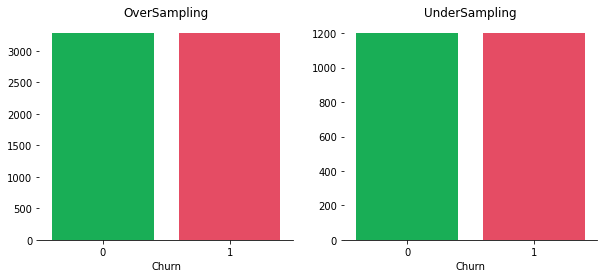

In [285]:
# CHECAR O TAMANHO DO DATASET APÓS O BALACEAMENTO
print(f'Tamanho Sem Balaceamento: {y_train.shape[0]}')
print(f'Tamanho Com Over Sampling: {y_ros.shape[0]}')
print(f'Tamanho Com Under Sampling: {y_rus.shape[0]}')
print('')
# PLOT DO TAMANHO DO DATASET APÓS O BALANCEAMENTO 
fig, ax = plt.subplots(nrows=1 , ncols=2, figsize=(10, 4))
sns.countplot(x=y_ros, ax=ax[0]);
sns.countplot(x=y_rus, ax=ax[1]);
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[0].set_ylabel("")
ax[1].set_ylabel("")
ax[1].set_title('UnderSampling')
ax[0].set_title('OverSampling')
plt.show()

# Validação Cruzada
A validação cruzada é uma técnica para avaliar como a análise estatística se generaliza para um conjunto de dados independente. É uma técnica para avaliar modelos de aprendizado de máquina treinando vários modelos em subconjuntos dos dados de entrada disponíveis e avaliando-os no subconjunto complementar dos dados. Usando validação cruzada, há grandes chances de que possamos detectar o ajuste excessivo com facilidade.

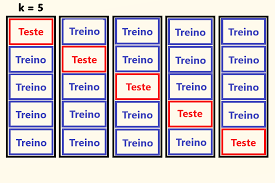

In [286]:
# FUNÇÃO DE VALIDAÇÃO CRUZADA
def val_model(X, y, clf, quite=False):
    """
    Realiza cross-validation com os dados de treino para determinado modelo.

    # Arguments
        X: DataFrame, contém as variáveis independentes.
        y: Series, vetor contendo a variável alvo.
        clf: modelo classificador do Scikit-learn.
        quite: bool, indicando se a função deve imprimir os resultados ou não.

    # Returns
        float, média dos scores da cross-validation.
    """

    X = np.array(X)
    y = np.array(y)

    pipeline = make_pipeline(StandardScaler(), clf)
    scores = cross_val_score(pipeline, X, y, scoring='recall')

    if quite == False:
        print("Recall: {:.2f} (+/- {:.2f})".format(scores.mean(), scores.std()))

    return scores.mean()

In [287]:
# MODELO COM DADOS DE TREINO
rf = RandomForestClassifier()
score_baseline = val_model(X_train, y_train, rf)

Recall: 0.50 (+/- 0.02)


* **Por que utilizamos o recall como forma de avaliar o modelo?**
 
O recall pode ser usado em situações em que os Falsos Negativos são considerados mais prejudiciais que os Falsos Positivos. Por exemplo, o modelo deve de qualquer maneira encontrar todos os consumidores que irão cancelar, mesmo que classifique alguns usuários fiéis como possíveis canceladores do serviço (situação de Falso Positivo) no processo. Ou seja, o modelo deve ter alto recall, pois classificar consumidores que têm alto potencial de cancelamento como clientes fiéis pode ser uma tragédia.
 
* **Por que usamos random forest como o primeiro modelo e quais foram seus resultados?**
 
A Random Forest, como o próprio nome indica, consiste em um grande número de Decision Trees que operam como um conjunto. Essa combinação de modelos, torna ele um algoritmo muito poderoso, por isso decidimos usá-lo como primeiro modelo da nossa validação cruzada e teremos um recall de comparação com os próximos modelos a serem avaliados com dados balanceados.
 
Vale ressaltar que o modelo treinado com os dados de treino apresentou um recall de 50%, ou seja, ele consegue prever 50% dos clientes com potencial de cancelamento.


# Modelo de Machine Learning
Os Modelos que serão testados são de Classificação para Aprendizado supervisionado, ou seja, irão analisar as variáveis independentes para prever a variável dependente (Churn), além disso na validação cruzada desses modelos usaremos dados balanceados com SMOTE e Under Sampling e definiremos qual teve melhor resultado.
 
Selecionamos 4 Modelos para comparação, são eles:
* **DecisionTree**
 
Modelo da árvore de decisão é uma árvore binária. Cada nó representa uma única variável de entrada (x) e um ponto de divisão nessa variável (assumindo que a variável seja numérica).Os nós das folhas da árvore contêm uma variável de saída (y) que é usada para fazer uma previsão. As previsões são feitas percorrendo as divisões da árvore até chegar a uma folha e gerar o valor da classe nessa folha.
* **RandomForest**
 
Os algoritmos Random Forest são criados por várias árvores de decisão, geralmente treinados com o método de bagging, cuja ideia principal é que a combinação de modelos aumenta o resultado final.
* **XGBoost**
 
Modelo de Machine Learning que usa a técnica de Gradient Boosting, capaz de combinar resultados de diversos classificadores "fracos" (tipicamente árvores de decisão) que são combinados mediante um comitê forte de decisão.
* **Logistic Regression**
 
A regressão logística é o método usado para problemas de classificação binária (problemas com dois valores de classe), utilizando conceitos de estatística e probabilidade. É um algoritmo que lida com questões e problemas de classificação, analisando diferentes aspectos ou variáveis de um objeto para depois determinar uma classe na qual ele se encaixa melhor.


In [288]:
# INSTANCIANDO MODELOS
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
lr = LogisticRegression()
xgb = XGBClassifier()

### Avaliando Modelos com UnderSampling

In [289]:
# AVALIAR DESEMPENHO DOS MODELOS (RECALL) COM UNDER SAMPLING
model = []
recall = []

for clf in (rf, dt,lr , xgb):
    model.append(clf.__class__.__name__)
    recall.append(val_model(X_rus, y_rus, clf, quite=True))

pd.DataFrame(data=recall, index=model, columns=['Recall'])

,Recall
RandomForestClassifier,0.770588
DecisionTreeClassifier,0.682472
LogisticRegression,0.812998
XGBClassifier,0.806342


O modelo com o melhor resultado (Recall mais alto) foi o XGBoost a qual utilizou dados balanceados com UnderSampling.

### Avaliando Modelos com SMOTE

In [290]:
model2 = []
recall2 = []
# avaliar o desempenho (recall)
for clf in (rf, dt,lr , xgb):
    model2.append(clf.__class__.__name__)
    recall2.append(val_model(X_ros, y_ros, clf, quite=True))

pd.DataFrame(data=recall2, index=model2, columns=['Recall'])

,Recall
RandomForestClassifier,0.865325
DecisionTreeClassifier,0.789263
LogisticRegression,0.811689
XGBClassifier,0.857121


O modelo com o melhor resultado (Recall mais alto) foi o RandomForest a qual utilizou dados balanceados com SMOTE.
 
Sabe-se que ao balancear os dados com SMOTE, perdemos a capacidade preditiva do modelo de prever as classes minoritárias, ou seja, algo que não queremos, porém vamos otimizar os hiperparâmetros somento do modelo XGBoost com Undersampling e SMOTE, ja que esse modelo tem uma melhor otimização de hiperparametros do que o RandomForest. Em seguinda, o Modelo com melhor desempenho nos dados de teste/validação será definido como o melhor modelo para usarmos com os dados de simulação real.






## Otimização de hiperparâmetros
 
Para evitar um tipo de situação chamada de overfitting: quando o nosso modelo fica "viciado" no treino e ruim para os testes, iremos otimizar nossos hiperparâmetros para tentar evitar o overfitting do modelo, vamos testar o modelo XGBoost com Undersampling e SMOTE e de acordo com o resultado iremos, replicar seus hiperparâmetros para o modelo de simulação real.
 
Os meio de otimização de hiperparâmetros mais conhecidos são:
* Grid Search
* Randomized Search
 
Para o nosso modelo usaremos o Random Search, pois, ele é um ótimo otimizador de hiperparâmetros, que funciona de forma semelhante ao grid search entretanto ao invés de testar todas as combinações com a vizinhança, o  random search, testa todas as combinações aleatórias dos hiperparâmetros, conforme um número de amostras especificado definido pelo usuário.
 
Sua principal vantagem em relação ao Grid Seach é que ao definirmos um número específico de amostras para cada hiperparâmetro do nosso modelo, conseguimos diminuir o tempo de processamento do algoritmo.

Todavia, antes de começarmos a definir nossos hiperparâmetros, vamos entender o que cada um significa:
 
* **N_estimators:** Indica o número de árvores a serem geradas
* **Max_depth:** Indica a altura máxima das árvores usadas pelo modelo, ou seja: a quantidade máxima de Nodes que podem haver da raiz até uma folha.
* **Min_child_weight:** Indica a soma mínima do peso da instância (hessian) necessária em uma child.
* **Gamma:** Indica a redução de perda mínima necessária para fazer uma partição adicional em um nó folha da árvore. Quanto maior gamma for, mais conservador será o algoritmo.
* **Learning rate:** Indica a taxa de aprendizado é usada para dimensionar a magnitude das atualizações de parâmetros durante a descida do gradiente.





 


###Hiperparâmetros do modelo XGBoost com SMOTE

In [291]:
n_estimators = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
max_depth = [1, 2, 3, 4, 5, 6, 7, 8]
min_child_weight = [1, 2, 3, 4, 5]
gamma = [0.1, 0.2, 0.3, 0.4, 0.5]
learning_rate = [0.001, 0.01, 0.1, 1]

xgb_parametrossmt = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'min_child_weight':min_child_weight,
    'gamma':gamma,
    'learning_rate':learning_rate}

xgbtuningsmt = RandomizedSearchCV(estimator=xgb, 
                              param_distributions=xgb_parametrossmt, ## Parâmetros
                              cv=4, ## Cross validation
                              n_iter=20, ## Número de Iterações
                              scoring = 'recall', ## Métrica
                              n_jobs = -1, ## Utilizando todos os processadores
                              verbose = 1)

## Fazendo o fit do tuning
xgbtuningsmt.fit(X_ros,y_ros)


Fitting 4 folds for each of 20 candidates, totalling 80 fits


RandomizedSearchCV(cv=4, estimator=XGBClassifier(), n_iter=20, n_jobs=-1,
                   param_distributions={'gamma': [0.1, 0.2, 0.3, 0.4, 0.5],
                                        'learning_rate': [0.001, 0.01, 0.1, 1],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                                        'min_child_weight': [1, 2, 3, 4, 5],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   scoring='recall', verbose=1)

In [292]:
xgbtuningsmt.best_estimator_

XGBClassifier(gamma=0.5, learning_rate=0.001, max_depth=1, min_child_weight=2,
              n_estimators=700)

### Validação dos Hiperparâmetros do modelo XGBoost com SMOTE

AxesSubplot(0.125,0.125;0.62x0.755)
              precision    recall  f1-score   support

           0     0.8886    0.8002    0.8421      1096
           1     0.5706    0.7257    0.6389       401

    accuracy                         0.7802      1497
   macro avg     0.7296    0.7629    0.7405      1497
weighted avg     0.8034    0.7802    0.7876      1497

AUC: 0.7629


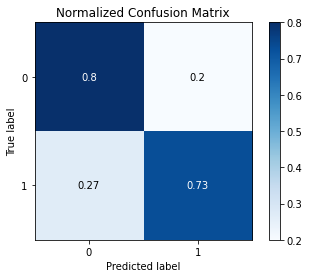

In [293]:
#DEFININDO MODELO E TREINANDO DADOS
xgbsmt = XGBClassifier(gamma=0.2, learning_rate=0.01, max_depth=7, min_child_weight=4,n_estimators=200)
xgbsmt.fit(X_ros, y_ros)
#FAZENDO PREVISAO EM CIMA DOS DADOS DE TESTE
X_testsmt = scaler.transform(X_test)
y_predsmt = xgbsmt.predict(X_testsmt)
# MATRIZ CONFUSÃO
print(skplt.metrics.plot_confusion_matrix(y_test, y_predsmt, normalize=True))
# MEDIDAS DE AVALIAÇÃO
print(classification_report(y_test, y_predsmt, digits=4))
# AUC
print("AUC: {:.4f}".format(roc_auc_score(y_test, y_predsmt)))


Podemos ver que a adoção de hiperparâmetros não resultou no recall acima do encontrado com a validação cruzada,mas,em um desempenho menor, com isso, fica evidente que o modelo sofreu com overfitting, ou seja, estava tendo resultados bons para os dados de treino mas ao fazer-lo com os dados de teste com apresentou déficit na sua capacidade preditiva, isso também, reforça o nosso ponto que ao balancear os dados com SMOTE a capacidade preditiva também diminui para as classes minoritárias.

### Hiperparâmetros do modelo XGBoost com UnderSampling

In [294]:
n_estimators = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
max_depth = [1, 2, 3, 4, 5, 6, 7, 8]
min_child_weight = [1, 2, 3, 4, 5]
gamma = [0.1, 0.2, 0.3, 0.4, 0.5]
learning_rate = [0.001, 0.01, 0.1, 1]

xgb_parametrosrus = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'min_child_weight':min_child_weight,
    'gamma':gamma,
    'learning_rate':learning_rate}

xgbtuningrus = RandomizedSearchCV(estimator=xgb, 
                              param_distributions=xgb_parametrosrus, ## Parâmetros
                              cv=4, ## Cross validation
                              n_iter=20, ## Número de Iterações
                              scoring = 'recall', ## Métrica
                              n_jobs = -1, ## Utilizando todos os processadores
                              verbose = 1)

## Fazendo o fit do tuning
xgbtuningrus.fit(X_rus,y_rus)


Fitting 4 folds for each of 20 candidates, totalling 80 fits


RandomizedSearchCV(cv=4, estimator=XGBClassifier(), n_iter=20, n_jobs=-1,
                   param_distributions={'gamma': [0.1, 0.2, 0.3, 0.4, 0.5],
                                        'learning_rate': [0.001, 0.01, 0.1, 1],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                                        'min_child_weight': [1, 2, 3, 4, 5],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   scoring='recall', verbose=1)

In [295]:
xgbtuningrus.best_estimator_

XGBClassifier(gamma=0.4, learning_rate=0.001, max_depth=1, min_child_weight=3,
              n_estimators=800)

### Validação dos Hiperparâmetros do modelo XGBoost com UnderSampling

AxesSubplot(0.125,0.125;0.62x0.755)
              precision    recall  f1-score   support

           0     0.9339    0.5803    0.7158      1096
           1     0.4363    0.8878    0.5850       401

    accuracy                         0.6627      1497
   macro avg     0.6851    0.7340    0.6504      1497
weighted avg     0.8006    0.6627    0.6808      1497

AUC: 0.7340


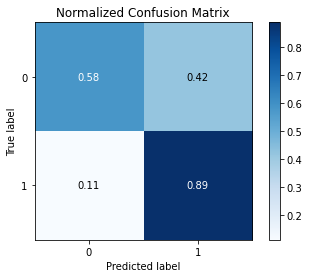

In [311]:
#DEFININDO MODELO E TREINANDO DADOS
xgbrus = XGBClassifier(gamma=0.4, learning_rate=0.001, max_depth=1, min_child_weight=3,n_estimators=800)
xgbrus.fit(X_rus, y_rus)
#FAZENDO PREVISAO EM CIMA DOS DADOS DE TESTE
X_testrus = scaler.transform(X_test)
y_predrus = xgbrus.predict(X_testrus)
# MATRIZ CONFUSÃO
print(skplt.metrics.plot_confusion_matrix(y_test, y_predrus, normalize=True))
# MEDIDAS DE AVALIAÇÃO
print(classification_report(y_test, y_predrus, digits=4))
# AUC
print("AUC: {:.4f}".format(roc_auc_score(y_test, y_predrus)))


Diferente do nosso modelo balanceado com SMOTE, este modelo atingiu um recall de quase 90% ao ser balanceado com Under Sampling, ou seja, ele não sofreu overfitting como o modelo anterior, logo usaremos seus hiperparâmetros para instanciar o modelo que usará os dados de simulação real.

##Importância de cada variável no modelo

In [312]:
feature_importances = pd.DataFrame(xgbrus.feature_importances_,
                                   index = X.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
Contract_Month-to-month,0.307072
OnlineSecurity_No,0.198407
InternetService_Fiber optic,0.179326
tenure,0.157693
TechSupport_No,0.157501
gender,0.000000
StreamingTV_Yes,0.000000
TechSupport_No internet service,0.000000
TechSupport_Yes,0.000000
StreamingTV_No,0.000000


Para o Modelo de XGBoost balanceado com Under Sampling e utilizado RandomizedSearchCV para definição dos melhores hiperparâmetros, as variáveis mais importantes para o modelo de previsão são:

* **Contract_Month-to-month**
* **OnlineSecurity_No**	
* **InternetService_Fiber optic**	
* **tenure**
* **TechSupport_No**

## Modelo vencedor com dados de Simulação real

              precision    recall  f1-score   support

           0     0.9207    0.5727    0.7062       791
           1     0.4007    0.8528    0.5452       265

    accuracy                         0.6430      1056
   macro avg     0.6607    0.7128    0.6257      1056
weighted avg     0.7902    0.6430    0.6658      1056

AUC: 0.7128



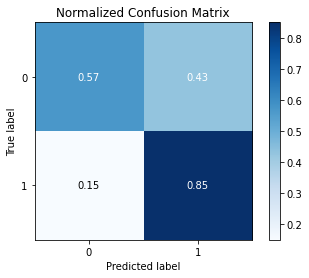

In [332]:
# ESCOLHENDO O MÉTODO DE PADRONIZAÇÃO
simu = simu_real.copy()

X_simu = simu.drop('Churn', axis=1)
y_simu = simu['Churn']

X_simu = scaler.transform(X_simu)

y_predsimu = xgbrus.predict(X_simu) 

# MATRIZ CONFUSÃO
skplt.metrics.plot_confusion_matrix(y_simu, y_predsimu, normalize=True)
# MEDIDAS DE AVALIAÇÃO
print(classification_report(y_simu, y_predsimu, digits=4))
# AUC
print("AUC: {:.4f}".format(roc_auc_score(y_simu, y_predsimu)))
print('')

Chegamos no modelo final do nosso projeto de previsão da taxa de rotatividade (Churn) para uma empresa de telecomunicações, mas antes de mostrar seus resultados e capacidade preditiva, vamos mostrar o que significa cada métrica avaliada do modelo.
 
As formas de desempenho avaliadas nos modelos serão principalmente:
* **Matriz Confusão:**


 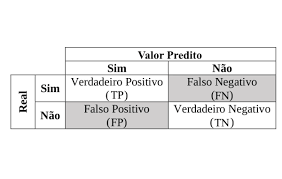


**Tipos de erros**
- **Verdadeiro positivo (*true positive* — TP):** Por exemplo, quando o cliente vai cancelar e o modelo classifica como potencial cancelador.
- **Falso positivo (*false positive* — FP):** Por exemplo, quando o cliente não vai cancelar e o modelo classifica como potencial cancelador.
- **Falso negativo (*true negative* — TN)** Por exemplo, quando o cliente vai cancelar e o modelo classifica como potencial renovação.
- **Verdadeiro negativo (*false negative* — FN):** Por exemplo, quando o cliente não vai cancelar e o modelo classifica como potencial renovação.
 
---
* **Acurácia:** A acurácia mostra diretamente a porcentagem de acertos do nosso modelo.
* **Recall:** Mostra a proporção de positivos encontrados corretamente, ou seja, o quanto o modelo é capaz de prever potenciais canceladores.
* **AUC:** A curva AUC é derivada da curva ROC, então vamos inicialmente entender a curva ROC, A curva ROC mostra o quão bom o modelo criado pode distinguir entre duas coisas, a AUC (“area under the ROC curve”) nada mais é que uma maneira de resumir a curva ROC em um único valor, agregando todos os limiares da ROC, calculando a “área sob a curva”.

**Agora que tudo ja foi explicado, vamos a conclusão do projeto.**

# Conclusão
O Modelo obteve as métricas de desempenho:
* **Acurácia:** 64.30% - Porcentagem de acertos do nosso modelo.
* **Recall:** 85.28% - Capacidade de prever potenciais canceladores.
* **Auc:** 71.28% - Precisão das classificações entre renovação e cancelamento.
 
De modo geral, o modelo apresentou um ótimo desempenho considerando que o nosso objetivo era um alto recall,ou seja, ter qualidade de prever somente as pessoas que irão cancelar como potenciais canceladores.
 
Com isso, uma capacidade preditiva de quase 86%, para os dados de simulação real é uma métrica bastante satisfatória, porém, ainda existe margem para melhorar o modelo como técnicas de feature engineering, feature selection e otimização de hiperparâmetros.
 
Por fim, através desta análise/modelo é possível traçar o perfil dos consumidores satisfeitos com os serviços prestados e aumentar a retenção dos clientes, visto que este custo é mais baixo do que o de aquisição de novos usuários.
 
Vale ressaltar que este projeto pertence ao curso Data Science na Prática do professor Carlos Melo.

